This notebook was used for visualization in the experiment - i.e., visualize the network and also show top 10 accuracies
of the ANN and results of the converted SNN

This is NOT REQUIRED to run the experiments and was only used for the visualization.
If you wish to run this, please install pydot using: **pip install pydot** and download graphviz: https://graphviz.gitlab.io/download/

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Execute this cell to create a visualization of the model
from tensorflow.python.keras.utils.vis_utils import plot_model
from tensorflow.python.keras.layers import Conv2D, BatchNormalization, Dropout, AveragePooling2D, Flatten, Dense, LSTM
from tensorflow.python.keras import Input, Model, Sequential
import tensorflow as tf

model_output_path = os.path.join('p300_exp_output', 'model.pdf')
os.makedirs('p300_exp_output', exist_ok=True)

def create_model():
    """
    Function to create tensorflow model
    """
    seed = -1
    inp = Input(shape=(3, 1200, 1), name='input_layer')
    conv2d = Conv2D(filters=6, kernel_size=(3, 3), activation=tf.nn.relu)(inp)
    dropout1 = Dropout(0.5, seed=seed)(conv2d)
    avg_pooling = AveragePooling2D(pool_size=(1, 8), padding='same')(dropout1)
    flatten = Flatten()(avg_pooling)
    dense1 = Dense(100, activation=tf.nn.relu)(flatten)
    batch_norm = BatchNormalization()(dense1)
    dropout2 = Dropout(0.5, seed=seed)(batch_norm)
    output = Dense(2, activation=tf.nn.softmax, name='output_layer')(dropout2)

    return Model(inputs=inp, outputs=output)



plot_model(create_model(), to_file=model_output_path, show_shapes=True, show_layer_names=False)

In [ ]:
# Config from notebook p300_dataset_exp_convnet.ipynb
snn_config = [
    [50, 1000, 0.01], # best performing parameters for simulator
    [50, 1000, None], # synaptic smoothing turned off
    [50, 1, 0.01], # spike scaling turned off
    [50, 1, None] # everything turned off, only RELU is swapped for spiking RELU
]

variants = []
for variant in snn_config:
        # name of the configuration
        name = f'snn [timesteps={variant[0]}, scaling={variant[1]}, synapse=None]' if variant[2] is None \
            else 'snn [timesteps={}, scaling={}, synapse={:3f}]'.format(variant[0], int(variant[1]), variant[2])
        variants.append(name)

In [3]:
default_output_path = 'p300_exp_output'

# Read excel file to the data frame
df = pd.read_excel(os.path.join(default_output_path, 'data_iterations.xlsx'))

In [4]:
# Filter top 10 accuracies of the ANN
top_10_accs_df = df.sort_values('ann_accuracy', ascending=False)[:10]

top_10_accs_df.head(5)

,Unnamed: 0,iterations,ann_accuracy,ann_precision,ann_recall,ann_f1,"snn [timesteps=50, scaling=1000, synapse=0.010000]_accuracy","snn [timesteps=50, scaling=1000, synapse=0.010000]_precision","snn [timesteps=50, scaling=1000, synapse=0.010000]_recall","snn [timesteps=50, scaling=1000, synapse=0.010000]_f1",...,"snn [timesteps=50, scaling=1000, synapse=None]_recall","snn [timesteps=50, scaling=1000, synapse=None]_f1","snn [timesteps=50, scaling=1, synapse=0.010000]_accuracy","snn [timesteps=50, scaling=1, synapse=0.010000]_precision","snn [timesteps=50, scaling=1, synapse=0.010000]_recall","snn [timesteps=50, scaling=1, synapse=0.010000]_f1","snn [timesteps=50, scaling=1, synapse=None]_accuracy","snn [timesteps=50, scaling=1, synapse=None]_precision","snn [timesteps=50, scaling=1, synapse=None]_recall","snn [timesteps=50, scaling=1, synapse=None]_f1"
21,21,22,0.647177,0.654295,0.622603,0.638056,0.644102,0.652266,0.616534,0.633897,...,0.617530,0.634271,0.511200,0.518771,0.302789,0.382390,0.494276,0.489831,0.287849,0.362610
24,24,25,0.645665,0.657895,0.605449,0.630583,0.648581,0.662309,0.605578,0.632674,...,0.608566,0.634476,0.501742,0.502063,0.363546,0.421722,0.518666,0.525802,0.375498,0.438117
25,25,26,0.643145,0.664726,0.576186,0.617297,0.642111,0.663230,0.576693,0.616942,...,0.577689,0.618997,0.531608,0.542282,0.402390,0.461978,0.517173,0.525000,0.355578,0.423990
10,10,11,0.642641,0.647490,0.624622,0.635850,0.641115,0.645427,0.625498,0.635306,...,0.625498,0.636917,0.543056,0.552956,0.447211,0.494493,0.525635,0.533074,0.409363,0.463099
18,18,19,0.642137,0.670303,0.558022,0.609031,0.641613,0.669856,0.557769,0.608696,...,0.558765,0.609451,0.531608,0.540025,0.423307,0.474595,0.545047,0.560811,0.413347,0.475917


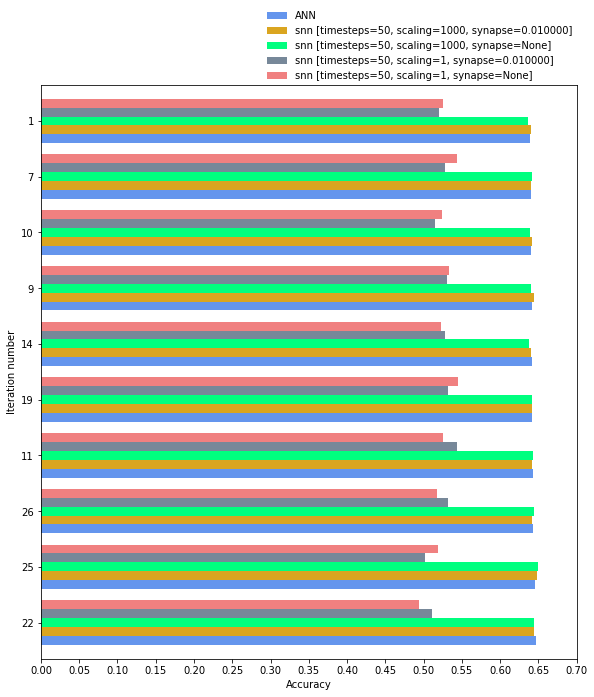

In [5]:
# Create chart for accuracies of the models

# Colors for each bar
colors = ['CornflowerBlue', 'GoldenRod', 'SpringGreen', 'LightSlateGray', 'LightCoral']

columns = ['ann_accuracy'] + [f'{name}_accuracy' for name in variants] # name of columns containing accuracy
ax = top_10_accs_df.plot.barh(x='iterations', y=columns,
                        width=0.8, color=colors,  figsize=[6.4 * 1.5, 8.8 * 1.2])


plt.xticks(np.arange(0, .75, 0.05))
plt.yticks(rotation=0)
plt.xlabel('Accuracy')
plt.ylabel('Iteration number')

# Set legend labels
legend_labels = ['ANN'] + variants
ax.legend(labels=legend_labels, loc='lower right', frameon=False, bbox_to_anchor=(1.0, 1.0),
          ncol=1, borderaxespad=0.)

In [6]:
# Paths for saving top 10 accuracies in .pdf and .svg
acc_top_10_path_svg = os.path.join(default_output_path, 'acc_top_10.svg')
acc_top_10_path_pdf = os.path.join(default_output_path, 'acc_top_10.pdf')


# Save output as svg and pdf file
fig = ax.get_figure()
fig.savefig(acc_top_10_path_svg, format='svg', bbox_inches='tight')
fig.savefig(acc_top_10_path_pdf, format='pdf', bbox_inches='tight')